# Analysis of Movie Reviews

## Things to Explore

1. How complete is the data? (How many null values in each column) Are the data types of each column correct?
2. How much do movies typically make at the box office? - piechart
3. Is there a genre that typically perform better at the box office? - boxplot
4. Can romance movies perform well if it is not released around the Valentine month(February)? - boxplot
5. Is there an inconsistency between the tomato score and audience score? - scatterplot

## To do

1. Work on Objective 1: Making workable data
   - Remove rows with null values
   - Change wrong data types into appropriate data types
2. Work on Objective 2: How much do movies typically make at the box office?
3. Work on Objective 3: Genre that perform better
4. Work on Objective 4: Romance movies performance by month
5. Work on Objective 5: Score inconsistency
6. Presentation

## Types of Plots

### matplotlib.pyplot
1. Line plot
2. Scatter plot
3. Histogram
4. Bar plot
5. Pie chart

### Seaborn

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [212]:
#Load the data
pd.set_option('display.max_columns', None)
movies_data = pd.read_csv("rotten_tomatoes_movies.csv")

#Get a glimpse of what the data is like
print(f"This dataset has {movies_data.shape[0]} rows and {movies_data.shape[1]} columns")
print(movies_data.columns)
print(movies_data.dtypes)
print(movies_data.head(5))

This dataset has 143258 rows and 16 columns
Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'rating',
       'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'boxOffice', 'distributor', 'soundMix'],
      dtype='object')
id                       object
title                    object
audienceScore           float64
tomatoMeter             float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
writer                   object
boxOffice                object
distributor              object
soundMix                 object
dtype: object
                     id                title  audienceScore  tomatoMeter  \
0    space-zombie-bingo  Space Zombie Bingo!           50.0          NaN

### Objective 1: How complete is the data? Are the data types for each column correct?

In [214]:
#Check for null values to see how complete the data is
print(movies_data.isnull().sum())

id                           0
title                      367
audienceScore            70010
tomatoMeter             109381
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4217
writer                   53142
boxOffice               128515
distributor             120257
soundMix                127341
dtype: int64


#### IMPORTANT NOTE:
Considering the questions we want to answer, we are only working with rows where the "title", "audienceScore", "tomatoMeter", "releaseDateTheaters", "runtimeMinutes", "genre", and "boxOffice" are not null. We won't be looking into release date for streaming.

In [216]:
not_null_mask = movies_data[["title", "audienceScore", "tomatoMeter", "releaseDateTheaters", "runtimeMinutes", "genre", "boxOffice"]].notnull().all(axis=1)
movies_data_no_null = movies_data[not_null_mask].copy()

#Remove unwanted columns
movies_data_no_null = movies_data_no_null[["title", "audienceScore", "tomatoMeter", "releaseDateTheaters", "releaseDateStreaming", "runtimeMinutes", "genre", "boxOffice"]]

#Check for null values
print(movies_data_no_null.isnull().sum())

#How many rows are we working with?
print(f"There are {len(movies_data_no_null)} rows in the movies_data_no_null dataframe")

print(movies_data_no_null.head())

title                     0
audienceScore             0
tomatoMeter               0
releaseDateTheaters       0
releaseDateStreaming    454
runtimeMinutes            0
genre                     0
boxOffice                 0
dtype: int64
There are 11003 rows in the movies_data_no_null dataframe
                       title  audienceScore  tomatoMeter releaseDateTheaters  \
5                     Adrift           65.0         69.0          2018-06-01   
17                       Paa           67.0         50.0          2009-12-04   
20  Sarah Palin: You Betcha!           61.0         32.0          2011-09-30   
31           A State of Mind           92.0         89.0          2005-08-10   
63              Race the Sun           41.0         22.0          1996-03-22   

   releaseDateStreaming  runtimeMinutes                      genre boxOffice  
5            2018-08-21           120.0  Adventure, Drama, Romance    $31.4M  
17                  NaN           133.0                      Drama

Considering that a large portion of the original data is missing (About 90% missing since the original dataset has 143,258 rows), the analysis should be taken with a pinch of salt.

Hey there learners, for those who are taking the Data Visualization track. Here's some ideas for integrating the core topics in your Jupyter Notebook:

1. Use try-except when loading your file 
# Try to read the CSV file
try:
    # Read the CSV file with tab as a separator
    df = pd.read_csv(file_path, sep='\t')
    
    # Print the first 5 rows of the DataFrame
    print("Here are the first 5 rows of the DataFrame:")
    print(df.head())

# Handle any exception that might occur
except:
    print("An error occurred while trying to read the file. Please check the file path and format.")

2. Use set to get the unique values in your column
print(f"The unique colors are: {set(df['Color'])}")

3. Create a list with list comprehension for values that match a certain condition in your dataset (Covers both list and for loop criteria in one shot)
[name for name in df['Name'] if name.startswith('A')]

4. Apply a function in a column for your dataset
# Define a function to categorize age
def categorize_age(age):
    if age < 25:
        return 'Young'
    elif 25 <= age < 30:
        return 'Adult'
    else:
        return 'Mature'

# Apply the function to the 'age' column
df['age_group'] = df['age'].apply(categorize_age)

In [219]:
#Correct data types for title, releaseDateTheaters, genre, and boxOffice

movies_data_no_null["title"] = movies_data_no_null["title"].astype("string")
movies_data_no_null["genre"] = movies_data_no_null["genre"].astype("string")
movies_data_no_null['releaseDateTheaters'] = pd.to_datetime(movies_data_no_null['releaseDateTheaters'], format='%Y-%m-%d', errors='coerce')

#Change the string values of "genre" to lower case
movies_data_no_null["genre"] = movies_data_no_null["genre"].str.lower()

#Standardise the "genre" column by changing formats like this: "action, mystery & thriller" to this: "action, mystery, thriller".
movies_data_no_null["genre"] = movies_data_no_null["genre"].apply(lambda string : string.replace(" & ", ", ") if " & " in string else string)

#Include lesbian and gay genres into lgbtq+
#For some reason, this VV does not work
# def lgbtq_genre_merge(string):
#     if "lesbian" and "gay" in string:
#         new_string = string.replace("lesbian", "lgbtq+")
#         new_string = string.replace("gay", "lgbtq+")
#         return new_string
#     elif "lesbian" in string:
#         new_string = string.replace("lesbian", "lgbtq+")
#         return new_string
#     elif "gay" in string:
#         new_string = string.replace("gay", "lgbtq+")
#         return new_string
#     else:
#         return string
# movies_data_no_null["genre"] = movies_data_no_null["genre"].apply(lgbtq_genre_merge)

#Merge lesbian and gay genres into lgbtq+
movies_data_no_null["genre"] = movies_data_no_null["genre"].apply(lambda string : string.replace("lesbian", "lgbtq+") if "lesbian" in string else string)
movies_data_no_null["genre"] = movies_data_no_null["genre"].apply(lambda string : string.replace("gay", "lgbtq+") if "gay" in string else string)

#Merge anime genre into animation
movies_data_no_null["genre"] = movies_data_no_null["genre"].apply(lambda string : string.replace("anime", "animation") if "anime" in string else string)

#Merge music genre into musical
movies_data_no_null['genre'] = movies_data_no_null['genre'].str.replace(r'\bmusic\b', 'musical', regex=True)

#All the lines below this comment are for converting string values in boxOffice to integers
movies_data_no_null["boxOffice"] = movies_data_no_null["boxOffice"].astype("string")

# conversion = {"M": 1000000,
#               "K": 1000}

# #Function for the conversion
# def str_to_int(string):
#     if 'M' in string:
#         return int(float(string[1:-1]) * conversion["M"])
#     elif 'K' in string:
#         return int(float(string[1:-1]) * conversion["K"])
#     else:
#         #For boxOffice values that are <=$999
#         return int(string[1:])

def str_to_float(string):
    if 'M' in string:
        return float(string[1:-1])
    elif 'K' in string:
        return float(string[1:-1]) / 1000
    else:
        #For boxOffice values that are <=$999
        return float(string[1:]) / 1000000


movies_data_no_null["boxOffice"] = movies_data_no_null["boxOffice"].apply(str_to_float)

#After the appropriate values are in the boxOffice column, convert the data type of that column
movies_data_no_null["boxOffice"] = movies_data_no_null["boxOffice"].astype("float64")

#Check the finalised dataframe
print(movies_data_no_null.head())
print(movies_data_no_null.dtypes)
print(movies_data_no_null.isnull().sum())

# filtered_column = movies_data_no_null[movies_data_no_null['boxOffice'] != 0]['boxOffice']
# print(filtered_column.min())

                       title  audienceScore  tomatoMeter releaseDateTheaters  \
5                     Adrift           65.0         69.0          2018-06-01   
17                       Paa           67.0         50.0          2009-12-04   
20  Sarah Palin: You Betcha!           61.0         32.0          2011-09-30   
31           A State of Mind           92.0         89.0          2005-08-10   
63              Race the Sun           41.0         22.0          1996-03-22   

   releaseDateStreaming  runtimeMinutes                      genre  boxOffice  
5            2018-08-21           120.0  adventure, drama, romance    31.4000  
17                  NaN           133.0                      drama     0.1992  
20           2017-03-08            90.0                documentary     0.0105  
31           2007-06-11            93.0                documentary     0.0415  
63           2002-04-30            99.0                      drama     1.7000  
title                   string[python]


### Objective 2: How much do movies typically earn at the box office?

In [221]:
#Basic statistical data of box office earnings from movies
print(movies_data_no_null["boxOffice"].describe())

count    11003.000000
mean        23.234757
std         54.433978
min          0.000000
25%          0.094500
50%          1.600000
75%         22.200000
max        858.400000
Name: boxOffice, dtype: float64


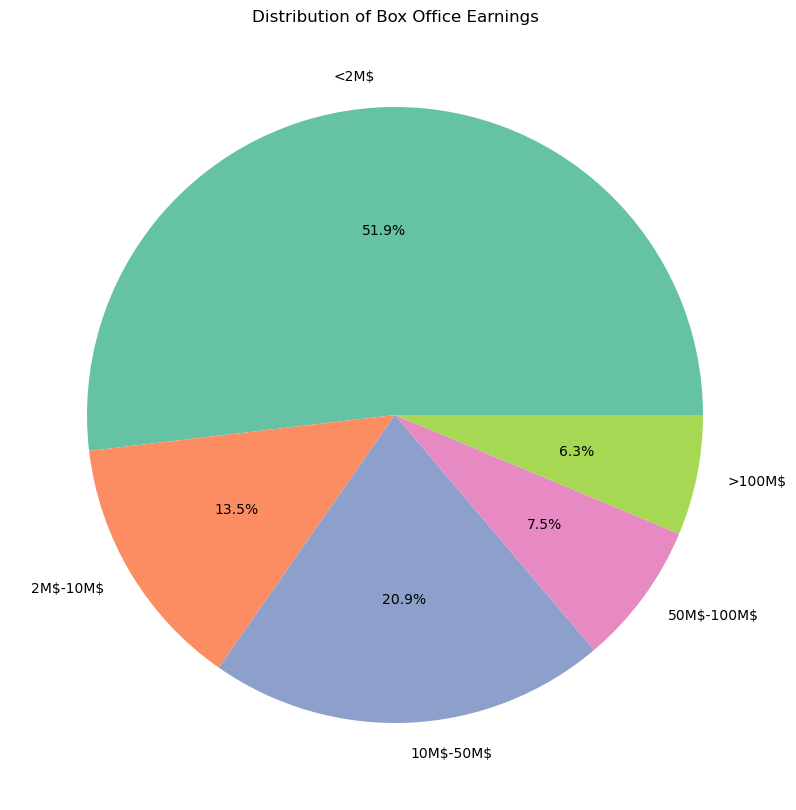

In [240]:
# Define the categories
bins_boxOffice = [0, 2, 10, 50, 100, 900]
labels_boxOffice = ['<2M$', '2M\\$-10M\\$', '10M\\$-50M\\$', "50M\\$-100M\\$", ">100M$"]

# Bin the data
movies_data_no_null["boxOffice_category"] = pd.cut(movies_data_no_null["boxOffice"], bins=bins_boxOffice, labels=labels_boxOffice, include_lowest=True)

# Count the number of movies in each category
category_counts = movies_data_no_null["boxOffice_category"].value_counts(sort=False)

# Plot the pie chart
fig = plt.figure(figsize=(10, 10))
ax = plt.pie(category_counts, labels=labels_boxOffice, autopct="%1.1f%%", colors=sns.color_palette("Set2", len(labels_boxOffice)))
plt.title('Distribution of Box Office Earnings')
plt.show()

### Objective 3: Which genre typically perform better?

We're going to split the genres into columns for each genre.

For example, let's say we can only find 4 genres in the string values of the original "genre" column, so there will be 4 new columns: "action", "romance", "comedy", "thriller". So for movie "A" that has the "genre" value of "action, romance, comedy", the values in the new columns will be 1 for "action", 1 for "romance", 1 for "comedy", and 0 for "thriller".

In [114]:
# Create binary columns for each genre
genre_dummies = movies_data_no_null["genre"].str.get_dummies(sep=", ")

# Combine the dummy columns with the original DataFrame
movies_with_genre_dummies = pd.concat([movies_data_no_null, genre_dummies], axis=1)

print(f"There are {movies_with_genre_dummies.shape[1]- movies_data_no_null.shape[1]} unique genres")
print(movies_with_genre_dummies.head(5))

There are 22 unique genres
                       title  audienceScore  tomatoMeter releaseDateTheaters  \
5                     Adrift           65.0         69.0          2018-06-01   
17                       Paa           67.0         50.0          2009-12-04   
20  Sarah Palin: You Betcha!           61.0         32.0          2011-09-30   
31           A State of Mind           92.0         89.0          2005-08-10   
63              Race the Sun           41.0         22.0          1996-03-22   

   releaseDateStreaming  runtimeMinutes                      genre  boxOffice  \
5            2018-08-21           120.0  adventure, drama, romance    31.4000   
17                  NaN           133.0                      drama     0.1992   
20           2017-03-08            90.0                documentary     0.0105   
31           2007-06-11            93.0                documentary     0.0415   
63           2002-04-30            99.0                      drama     1.7000   

    a

In [116]:
#Make a list of columns excluding the dummy columns, and the original "genre" column
column_list_no_genre = movies_data_no_null.columns.tolist()
print(column_list_no_genre)
column_list_no_genre.pop(-2)
print(column_list_no_genre)

# Melt the DataFrame to get a long-form DataFrame suitable for seaborn
movies_melted = movies_with_genre_dummies.melt(id_vars=column_list_no_genre,
                                               value_vars=genre_dummies.columns,
                                               var_name='genre',
                                               value_name='is_genre')

#Basically, if let's say a movie has 3 genres, that movie will appear 3 times in the movies_melted dataframe; once for each genre
print(movies_melted.tail())
print(movies_melted["genre"].unique())

['title', 'audienceScore', 'tomatoMeter', 'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes', 'genre', 'boxOffice']
['title', 'audienceScore', 'tomatoMeter', 'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes', 'boxOffice']
                                            title  audienceScore  tomatoMeter  \
242061                               Blind Dating           46.0         25.0   
242062        Art Is ... the Permanent Revolution           71.0        100.0   
242063  SHOT! The Psycho-Spiritual Mantra of Rock           45.0         94.0   
242064                                  Summering           40.0         34.0   
242065                                   Fun Size           47.0         25.0   

       releaseDateTheaters releaseDateStreaming  runtimeMinutes  boxOffice  \
242061          2007-05-11           2008-02-05            99.0     0.0874   
242062          2012-03-02           2012-08-14            82.0     0.0043   
242063          2017-04-07    

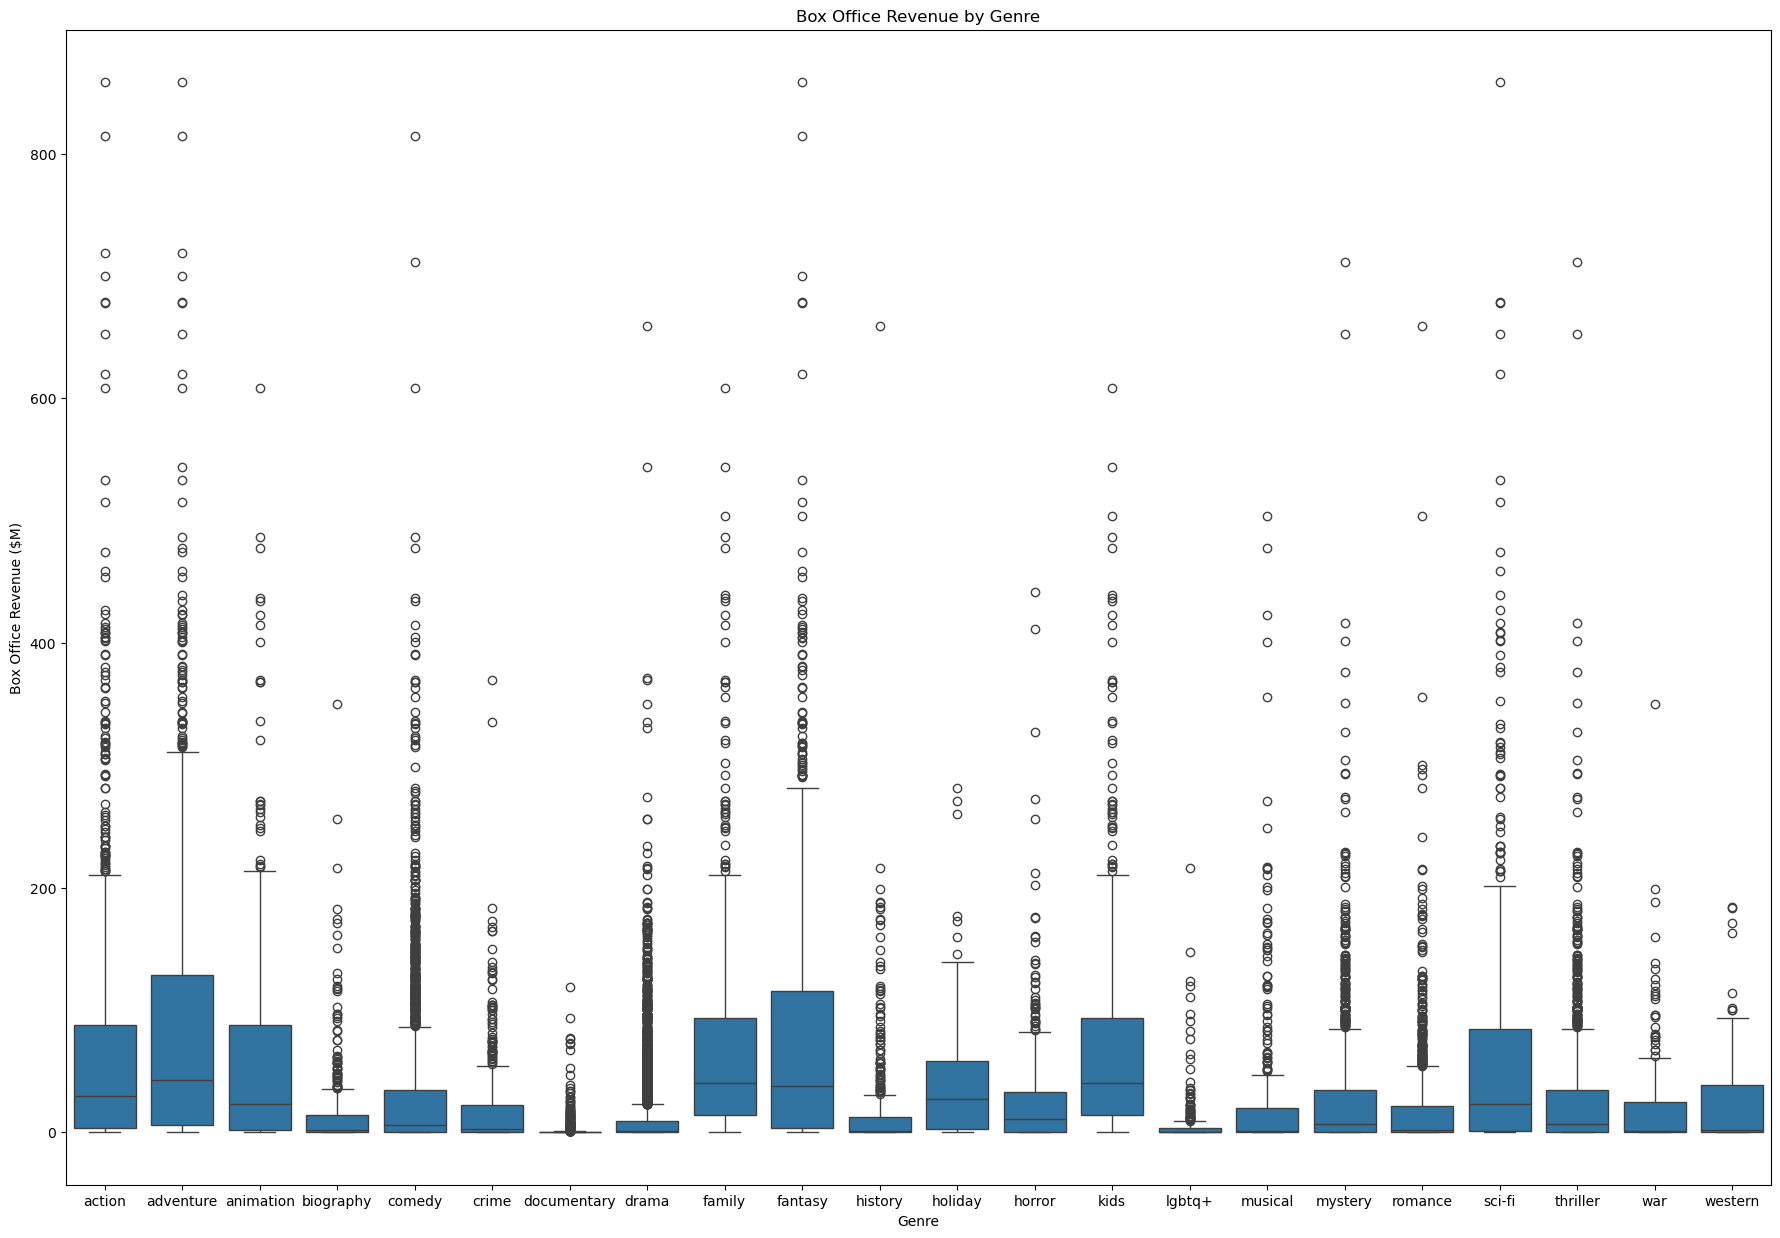

In [122]:
# Filter the melted DataFrame to include only rows where the genre is present (is_genre == 1)
movies_filtered = movies_melted[movies_melted['is_genre'] == 1]

# Create the box plot
fig = plt.figure(figsize=(22, 15))
ax = sns.boxplot(x='genre', y='boxOffice', data=movies_filtered)
plt.title('Box Office Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Box Office Revenue ($M)')
plt.show()

id                         0
title                      0
audienceScore              0
tomatoMeter                0
rating                  6517
ratingContents          6517
releaseDateTheaters     2022
releaseDateStreaming     670
runtimeMinutes            11
genre                      0
originalLanguage          13
director                  19
writer                  1830
boxOffice                  0
distributor             2712
soundMix                6166
dtype: int64
13030
